## **Feature Engineering**

## Objectives

*   Engineer features for Classification, Regression and Cluster models

## Inputs

* inputs/datasets/cleaned/TrainSet.csv
* inputs/datasets/cleaned/TestSet.csv

## Outputs

* generate a list with variables to engineer

## Conclusions

* Feature Engineering Transformers
  * Ordinal categorical encoding: `['gender', 'Partner', Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']`
  * Smart Correlation Selection: `['OnlineSecurity', 'DeviceProtection', 'TechSupport']`

---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/House-Sales/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/House-Sales'

---

# Load Cleaned Data

Train Set

In [4]:
import pandas as pd
train_set_path = "outputs/datasets/clean-records/TrainSetCleaned.csv"
TrainSet = pd.read_csv(train_set_path)
TrainSet.head(10)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      1828       0.0           3.0           Av          48      Missing   
1       894       0.0           2.0           No           0          Unf   
2       964       0.0           2.0           No         713          ALQ   
3      1689       0.0           3.0           No        1218          GLQ   
4      1541       0.0           3.0           No           0          Unf   
5      1221       0.0           2.0           No         410          GLQ   
6      1324       0.0           3.0           No         643          Rec   
7       696     720.0           3.0           No         604          ALQ   
8       526     462.0           2.0           Gd         462          GLQ   
9       869     349.0           3.0           No         375          ALQ   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0       1774         774          Unf       2007.0  ...    11694        90.0   
1        894         308      Missing       1962.0  ...     6600        60.0   
2        163         432          Unf       1921.0  ...    13360        80.0   
3        350         857          RFn       2002.0  ...    13265        69.0   
4       1541         843          RFn       2001.0  ...    13704       118.0   
5        811         400          RFn       2004.0  ...     7500        62.0   
6        445         440      Missing       1965.0  ...     8658        84.0   
7         92         484          Unf       1999.0  ...     2572        24.0   
8          0         297          Unf       1973.0  ...     1596        21.0   
9        360         440          Unf       2003.0  ...     6000        60.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0       452.0          108            5            9         1822       2007   
1         0.0            0            5            5          894       1962   
2         0.0            0            7            5          876       1921   
3       148.0           59            5            8         1568       2002   
4       150.0           81            5            7         1541       2001   
5         0.0          113            5            7         1221       2004   
6       101.0          138            5            6         1088       1965   
7         0.0           44            5            7          696       1999   
8         0.0          101            5            4          462       1973   
9         0.0            0            6            6          735       1941   

   YearRemodAdd  SalePrice  
0          2007     314813  
1          1962     109500  
2          2006     163500  
3          2002     271000  
4          2002     205000  
5          2005     185000  
6          1965     160000  
7          1999     155000  
8          1973      91000  
9          1950     131000  

[10 rows x 22 columns]

Test Set

In [5]:
test_set_path = 'outputs/datasets/clean-records/TestSetCleaned.csv'
TestSet = pd.read_csv(test_set_path)
TestSet.head(10)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      2515       0.0           4.0           No        1219          Rec   
1       958     620.0           3.0           No         403          BLQ   
2       979     224.0           3.0           No         185          LwQ   
3      1156     866.0           4.0           No         392          BLQ   
4       525       0.0           3.0           No           0          Unf   
5      1022       0.0           2.0           No         247      Missing   
6      1464       0.0           3.0           Gd         929          GLQ   
7       780     595.0           3.0           No           0      Missing   
8      2411    2065.0           4.0           Av        2096          GLQ   
9       551     551.0           2.0           No         239          GLQ   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0        816         484      Missing       1975.0  ...    32668        69.0   
1        238         240          Unf       1941.0  ...     9490        79.0   
2        524         352          Unf       1950.0  ...     7015        69.0   
3        768         505          Fin       1977.0  ...    10005        83.0   
4        525         264          Unf       1971.0  ...     1680        21.0   
5        310         280          Unf       1956.0  ...     7200        60.0   
6        556         754          Unf       2007.0  ...    15256        49.0   
7        780         544          Unf       1979.0  ...     9000        50.0   
8        300         813          Fin       1996.0  ...    15623       160.0   
9        312         480          Unf       2004.0  ...     5105        69.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0         0.0            0            3            6         2035       1957   
1         0.0            0            7            6          806       1941   
2       161.0            0            4            5          709       1950   
3       299.0          117            5            7         1160       1977   
4       381.0            0            5            6          525       1971   
5         0.0           30            4            5         1022       1910   
6        84.0          160            5            8         1485       2007   
7         0.0          162            6            6          780       1937   
8         0.0           78            5           10         2396       1996   
9         0.0           60            5            7          551       2004   

   YearRemodAdd  SalePrice  
0          1975     200624  
1          1950     133000  
2          1950     110000  
3          1977     192000  
4          1971      88000  
5          2006      85000  
6          2007     282922  
7          1950     141000  
8          1996     745000  
9          2004     148800  

[10 rows x 22 columns]

---

# Data Exploration

In [7]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=TrainSet, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Engineering

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')


def FeatureEngineeringAnalysis(df, analysis_type=None):
    check_missing_values(df)
    allowed_types = ['numerical', 'ordinal_encoder', 'outlier_winsorizer']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    list_column_transformers = define_list_column_transformers(analysis_type)

    df_feat_eng = pd.DataFrame([])
    for column in df.columns:
        
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        transformer_evaluation(
            column, list_applied_transformers, analysis_type, df_feat_eng)

    return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
    
    if analysis_type is None:
        raise SystemExit(
            f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
    if analysis_type not in allowed_types:
        raise SystemExit(
            f"analysis_type argument should be one of these options: {allowed_types}")


def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise SystemExit(
            f"There is a missing value in your dataset. Please handle that before getting into feature engineering.")


def define_list_column_transformers(analysis_type):
    """ Set suffix columns according to analysis_type"""
    if analysis_type == 'numerical':
        list_column_transformers = [
            "log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"]

    elif analysis_type == 'ordinal_encoder':
        list_column_transformers = ["ordinal_encoder"]

    elif analysis_type == 'outlier_winsorizer':
        list_column_transformers = ['iqr']

    return list_column_transformers


def apply_transformers(analysis_type, df_feat_eng, column):
    for col in df_feat_eng.select_dtypes(include='category').columns:
        df_feat_eng[col] = df_feat_eng[col].astype('object')

    if analysis_type == 'numerical':
        df_feat_eng, list_applied_transformers = FeatEngineering_Numerical(
            df_feat_eng, column)

    elif analysis_type == 'outlier_winsorizer':
        df_feat_eng, list_applied_transformers = FeatEngineering_OutlierWinsorizer(
            df_feat_eng, column)

    elif analysis_type == 'ordinal_encoder':
        df_feat_eng, list_applied_transformers = FeatEngineering_CategoricalEncoder(
            df_feat_eng, column)

    return df_feat_eng, list_applied_transformers


def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
    
    print(f"* Variable Analyzed: {column}")
    print(f"* Applied transformation: {list_applied_transformers} \n")
    for col in [column] + list_applied_transformers:

        if analysis_type != 'ordinal_encoder':
            DiagnosticPlots_Numerical(df_feat_eng, col)

        else:
            if col == column:
                DiagnosticPlots_Categories(df_feat_eng, col)
            else:
                DiagnosticPlots_Numerical(df_feat_eng, col)

        print("\n")


def DiagnosticPlots_Categories(df_feat_eng, col):
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df_feat_eng, x=col, palette=[
                  '#432371'], order=df_feat_eng[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.suptitle(f"{col}", fontsize=30, y=1.05)
    plt.show()
    print("\n")


def DiagnosticPlots_Numerical(df, variable):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.histplot(data=df, x=variable, kde=True, element="step", ax=axes[0])
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    sns.boxplot(x=df[variable], ax=axes[2])

    axes[0].set_title('Histogram')
    axes[1].set_title('QQ Plot')
    axes[2].set_title('Boxplot')
    fig.suptitle(f"{variable}", fontsize=30, y=1.05)
    plt.tight_layout()
    plt.show()


def FeatEngineering_CategoricalEncoder(df_feat_eng, column):
    list_methods_worked = []
    try:
        encoder = OrdinalEncoder(encoding_method='arbitrary', variables=[
                                 f"{column}_ordinal_encoder"])
        df_feat_eng = encoder.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_ordinal_encoder")

    except Exception:
        df_feat_eng.drop([f"{column}_ordinal_encoder"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng, column):
    list_methods_worked = []

    try:
        disc = Winsorizer(
            capping_method='iqr', tail='both', fold=1.5, variables=[f"{column}_iqr"])
        df_feat_eng = disc.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_iqr")
    except Exception:
        df_feat_eng.drop([f"{column}_iqr"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_Numerical(df_feat_eng, column):
    list_methods_worked = []

    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_e"])
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_e")
    except Exception:
        df_feat_eng.drop([f"{column}_log_e"], axis=1, inplace=True)

    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_10"], base='10')
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_10")
    except Exception:
        df_feat_eng.drop([f"{column}_log_10"], axis=1, inplace=True)

    try:
        rt = vt.ReciprocalTransformer(variables=[f"{column}_reciprocal"])
        df_feat_eng = rt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_reciprocal")
    except Exception:
        df_feat_eng.drop([f"{column}_reciprocal"], axis=1, inplace=True)

    try:
        pt = vt.PowerTransformer(variables=[f"{column}_power"])
        df_feat_eng = pt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_power")
    except Exception:
        df_feat_eng.drop([f"{column}_power"], axis=1, inplace=True)

    try:
        bct = vt.BoxCoxTransformer(variables=[f"{column}_box_cox"])
        df_feat_eng = bct.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_box_cox")
    except Exception:
        df_feat_eng.drop([f"{column}_box_cox"], axis=1, inplace=True)

    try:
        yjt = vt.YeoJohnsonTransformer(variables=[f"{column}_yeo_johnson"])
        df_feat_eng = yjt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_yeo_johnson")
    except Exception:
        df_feat_eng.drop([f"{column}_yeo_johnson"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked

In [ ]:
variables_engineering= ['KitchenQual', 'GarageFinish','BsmtExposure', 'BsmtFinType1']

variables_engineering

In [11]:
encoder = OrdinalEncoder(encoding_method='arbitrary', variables = variables_engineering)
TrainSet = encoder.fit_transform(TrainSet)
TestSet = encoder.transform(TestSet)

print("* Categorical encoding - ordinal transformation done!")

* Categorical encoding - ordinal transformation done!


In [12]:
df_engineering = TrainSet[variables_engineering].copy()
df_engineering.head(10)

KitchenQual  GarageFinish  BsmtExposure  BsmtFinType1
0            0             0             0             0
1            1             1             1             1
2            1             0             1             2
3            0             2             1             3
4            0             2             1             1
5            0             2             1             3
6            1             1             1             4
7            0             0             1             2
8            1             0             2             3
9            1             0             1             2

* Variable Analyzed: KitchenQual
* Applied transformation: [] 



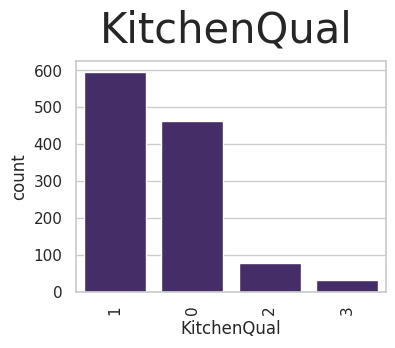





* Variable Analyzed: GarageFinish
* Applied transformation: [] 



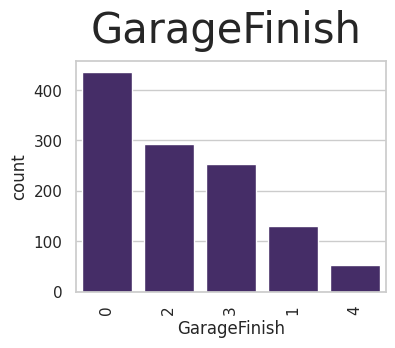





* Variable Analyzed: BsmtExposure
* Applied transformation: [] 



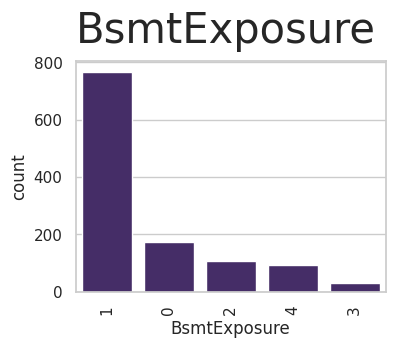





* Variable Analyzed: BsmtFinType1
* Applied transformation: [] 



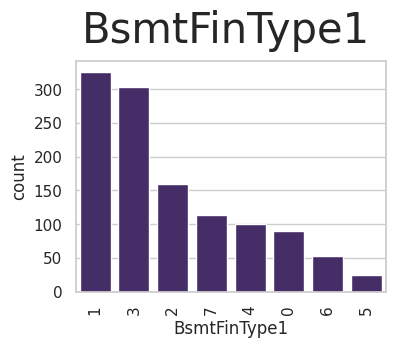

In [13]:
ordinal = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='ordinal_encoder')

---

In [14]:
variables_engineering = ['OverallCond', 'LotArea', 'OpenPorchSF', '2ndFlrSF', 'LotFrontage',
                         'BedroomAbvGr','BsmtUnfSF', 'OpenPorchSF', '1stFlrSF','BsmtFinSF1', 'MasVnrArea', 
                         'GarageYrBlt', 'YearRemodAdd', 'TotalBsmtSF','GarageArea', 'GrLivArea', 'OverallQual',
                         'SalePrice', 'YearBuilt']
variables_engineering

['OverallCond',
 'LotArea',
 'OpenPorchSF',
 '2ndFlrSF',
 'LotFrontage',
 'BedroomAbvGr',
 'BsmtUnfSF',
 'OpenPorchSF',
 '1stFlrSF',
 'BsmtFinSF1',
 'MasVnrArea',
 'GarageYrBlt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'SalePrice',
 'YearBuilt']

In [15]:
df_engineering = TrainSet[variables_engineering].copy()
df_engineering.head(10)

OverallCond  LotArea  OpenPorchSF  2ndFlrSF  LotFrontage  BedroomAbvGr  \
0            5    11694          108       0.0         90.0           3.0   
1            5     6600            0       0.0         60.0           2.0   
2            7    13360            0       0.0         80.0           2.0   
3            5    13265           59       0.0         69.0           3.0   
4            5    13704           81       0.0        118.0           3.0   
5            5     7500          113       0.0         62.0           2.0   
6            5     8658          138       0.0         84.0           3.0   
7            5     2572           44     720.0         24.0           3.0   
8            5     1596          101     462.0         21.0           2.0   
9            6     6000            0     349.0         60.0           3.0   

   BsmtUnfSF  OpenPorchSF  1stFlrSF  BsmtFinSF1  MasVnrArea  GarageYrBlt  \
0       1774          108      1828          48       452.0       2007.0   
1        894            0       894           0         0.0       1962.0   
2        163            0       964         713         0.0       1921.0   
3        350           59      1689        1218       148.0       2002.0   
4       1541           81      1541           0       150.0       2001.0   
5        811          113      1221         410         0.0       2004.0   
6        445          138      1324         643       101.0       1965.0   
7         92           44       696         604         0.0       1999.0   
8          0          101       526         462         0.0       1973.0   
9        360            0       869         375         0.0       2003.0   

   YearRemodAdd  TotalBsmtSF  GarageArea  GrLivArea  OverallQual  SalePrice  \
0          2007         1822         774       1828            9     314813   
1          1962          894         308        894            5     109500   
2          2006          876         432        964            5     163500   
3          2002         1568         857       1689            8     271000   
4          2002         1541         843       1541            7     205000   
5          2005         1221         400       1221            7     185000   
6          1965         1088         440       1324            6     160000   
7          1999          696         484       1416            7     155000   
8          1973          462         297        988            4      91000   
9          1950          735         440       1218            6     131000   

   YearBuilt  
0       2007  
1       1962  
2       1921  
3       2002  
4       2001  
5       2004  
6       1965  
7       1999  
8       1973  
9       1941

* Variable Analyzed: OverallCond
* Applied transformation: ['OverallCond_log_e', 'OverallCond_log_10', 'OverallCond_reciprocal', 'OverallCond_power', 'OverallCond_box_cox', 'OverallCond_yeo_johnson'] 



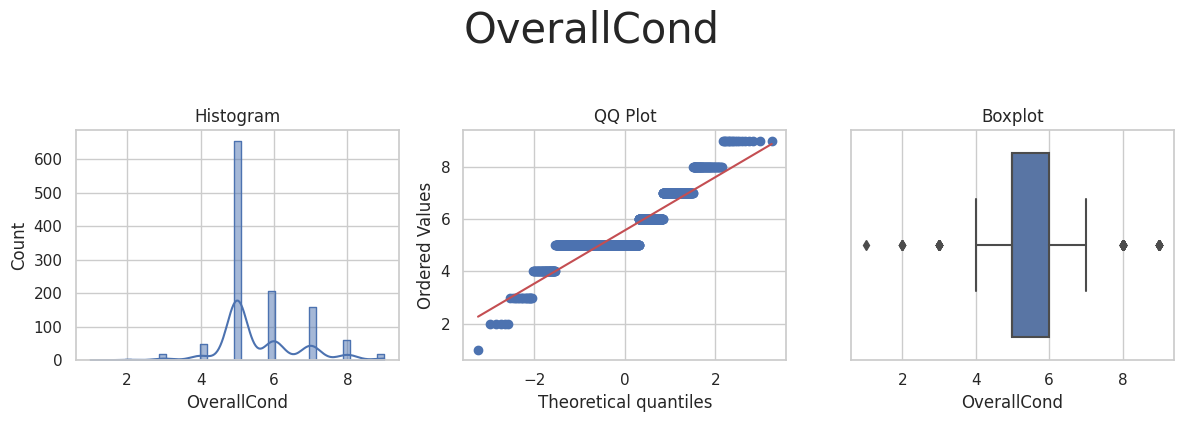

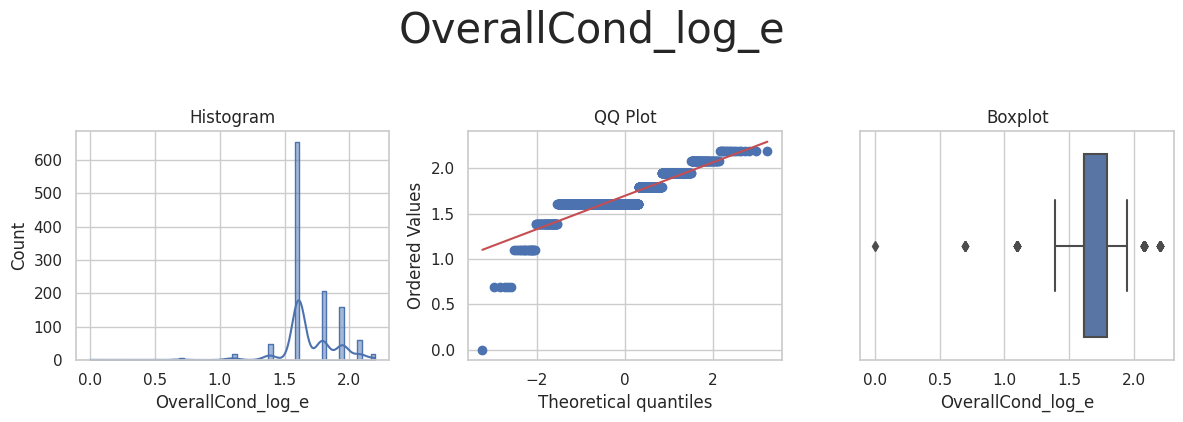

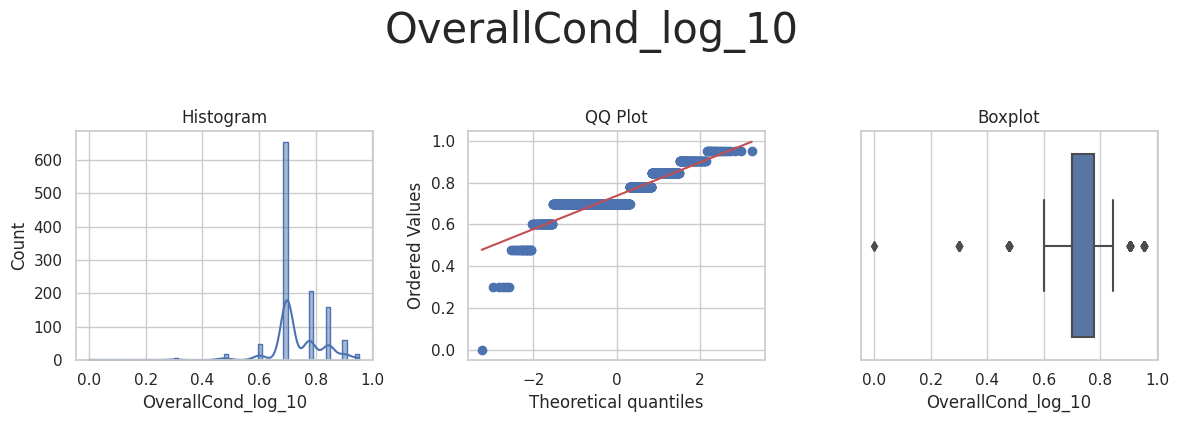

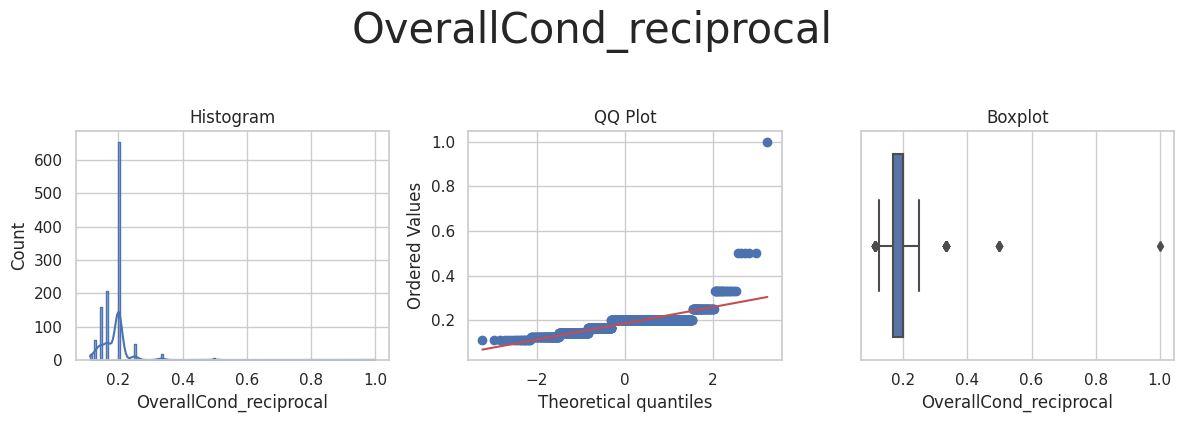

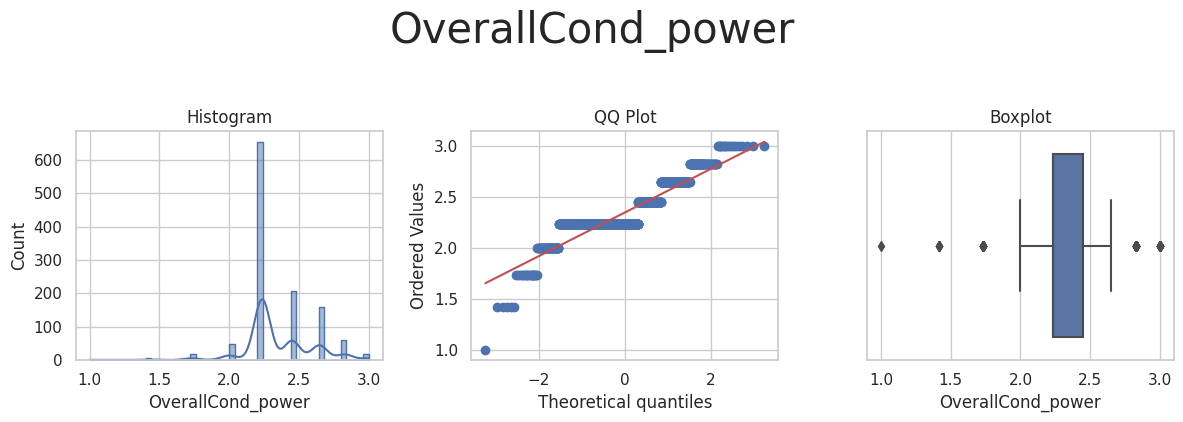

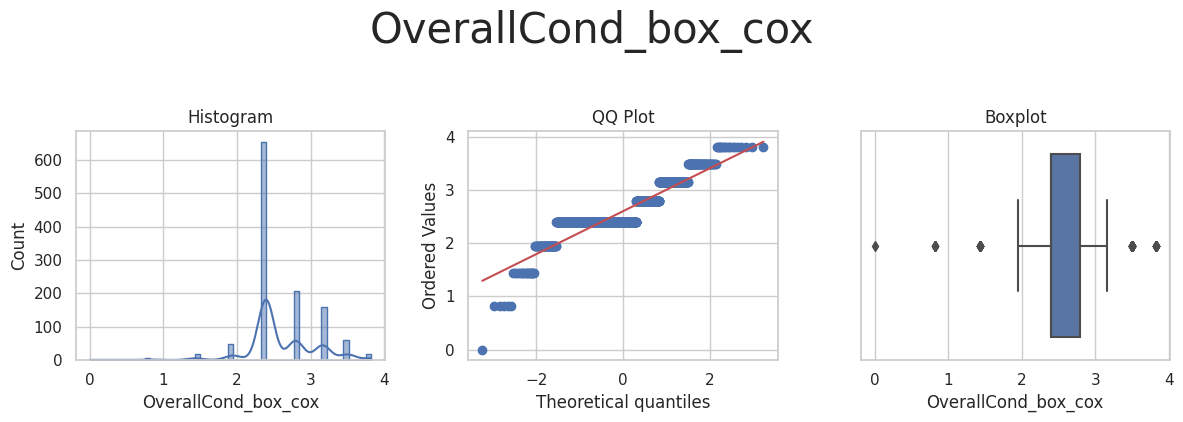

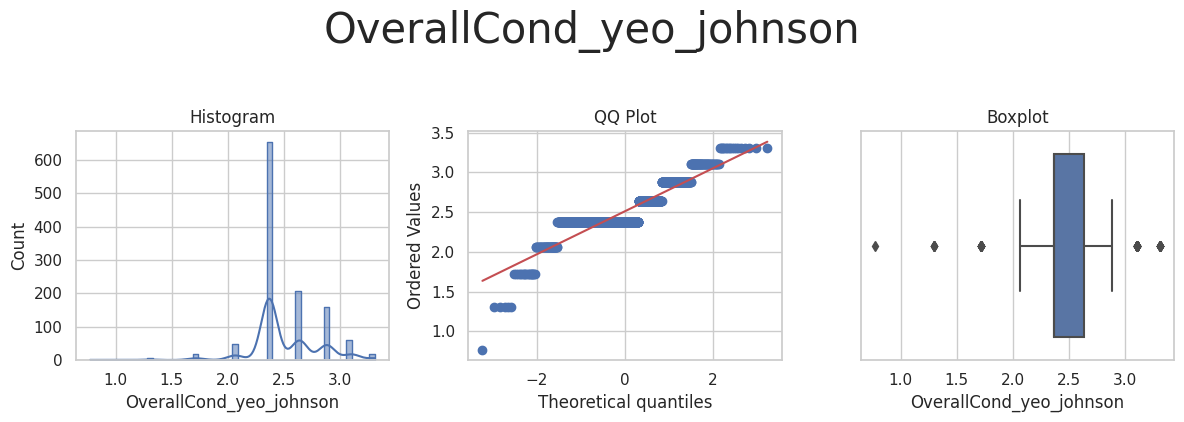



* Variable Analyzed: LotArea
* Applied transformation: ['LotArea_log_e', 'LotArea_log_10', 'LotArea_reciprocal', 'LotArea_power', 'LotArea_box_cox', 'LotArea_yeo_johnson'] 



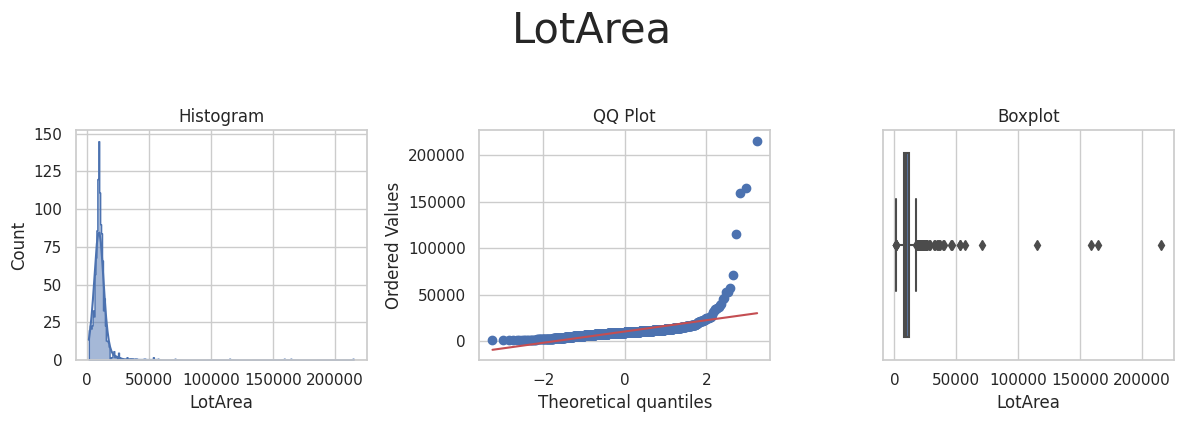

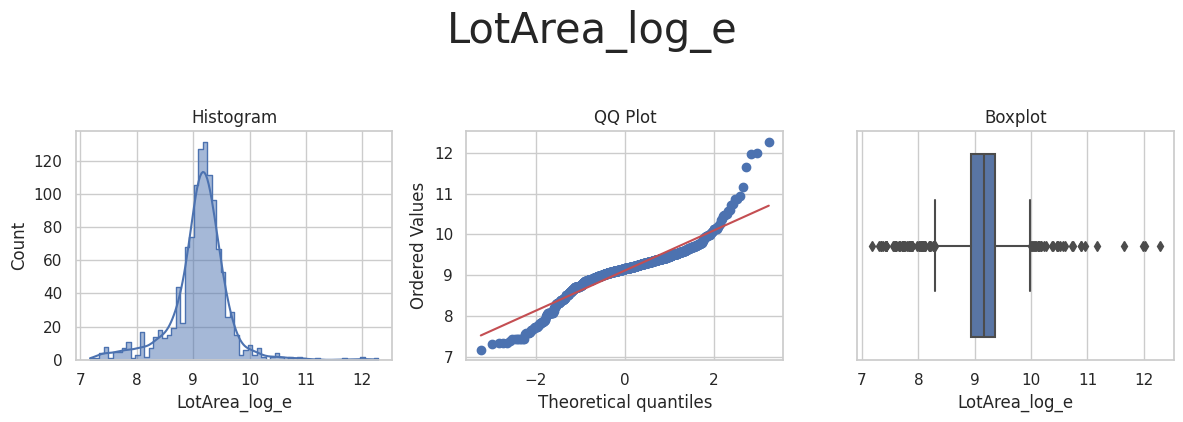

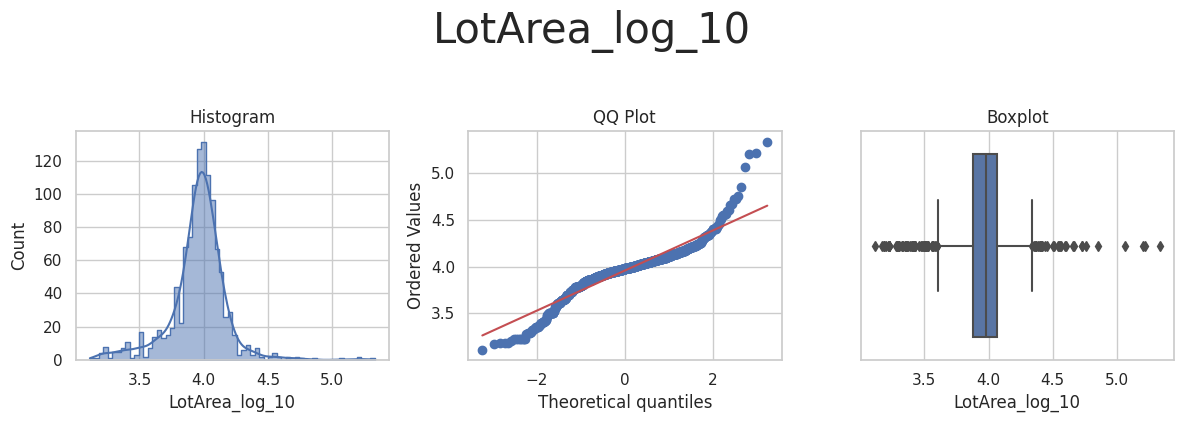

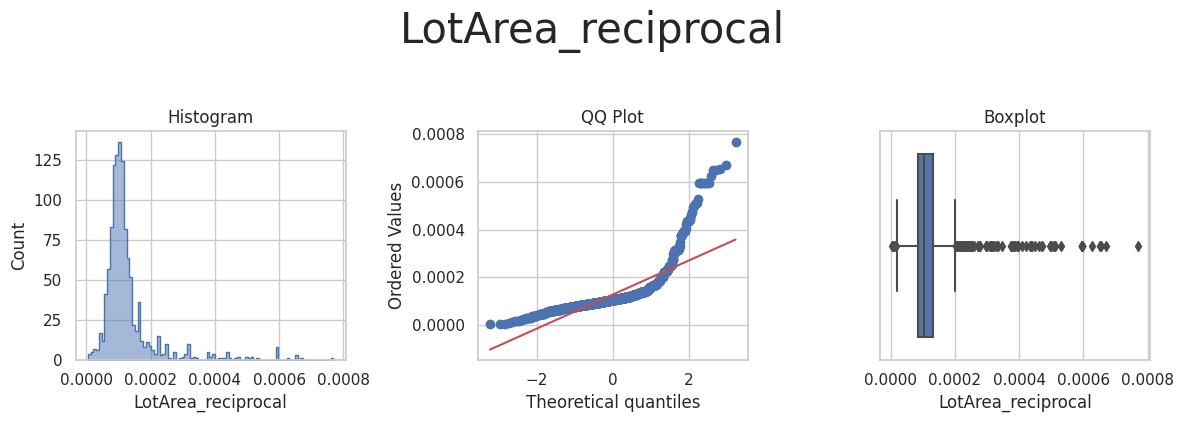

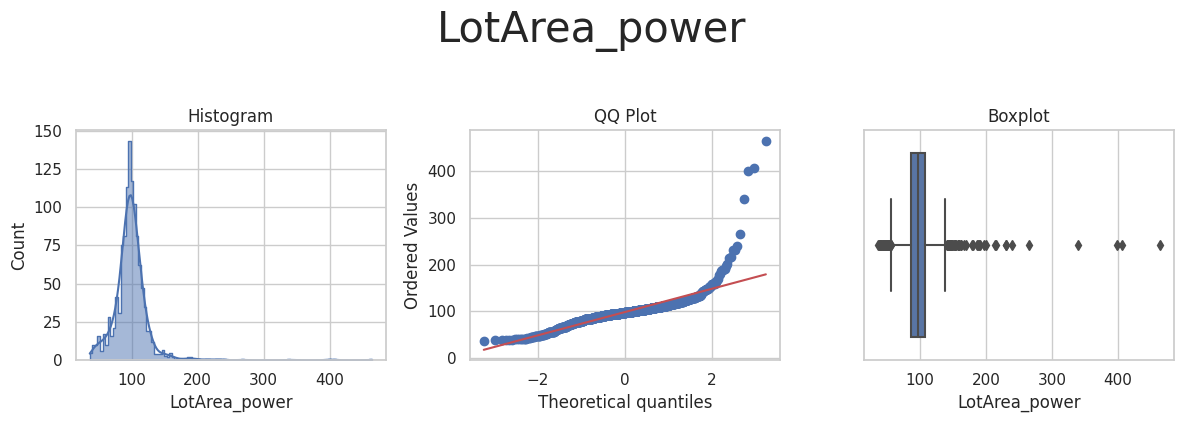

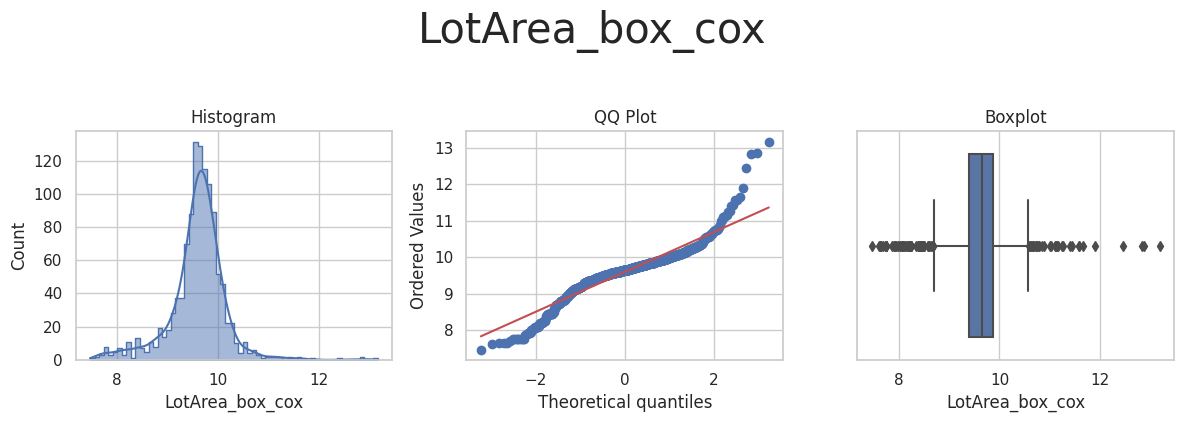

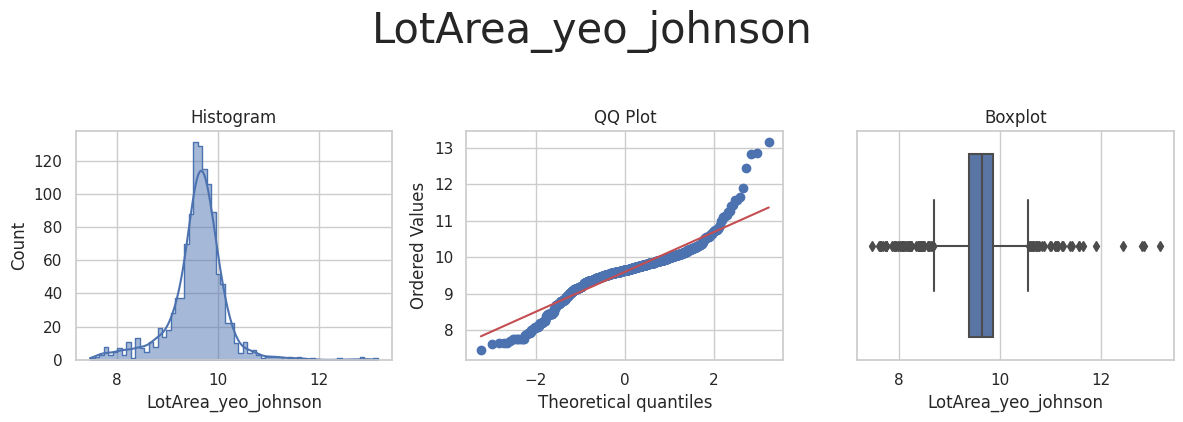

ValueError: Expected a 1D array, got an array with shape (1168, 2)

In [18]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='numerical')

---

In [19]:
variables_engineering = ['OverallCond', 'LotArea', 'OpenPorchSF', '2ndFlrSF', 'LotFrontage',
                         'BedroomAbvGr','BsmtUnfSF', 'OpenPorchSF', '1stFlrSF','BsmtFinSF1', 'MasVnrArea', 
                         'GarageYrBlt', 'YearRemodAdd', 'TotalBsmtSF','GarageArea', 'GrLivArea', 'OverallQual',
                         'SalePrice', 'YearBuilt','KitchenQual', 'GarageFinish','BsmtExposure', 'BsmtFinType1']
variables_engineering

['OverallCond',
 'LotArea',
 'OpenPorchSF',
 '2ndFlrSF',
 'LotFrontage',
 'BedroomAbvGr',
 'BsmtUnfSF',
 'OpenPorchSF',
 '1stFlrSF',
 'BsmtFinSF1',
 'MasVnrArea',
 'GarageYrBlt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'SalePrice',
 'YearBuilt',
 'KitchenQual',
 'GarageFinish',
 'BsmtExposure',
 'BsmtFinType1']

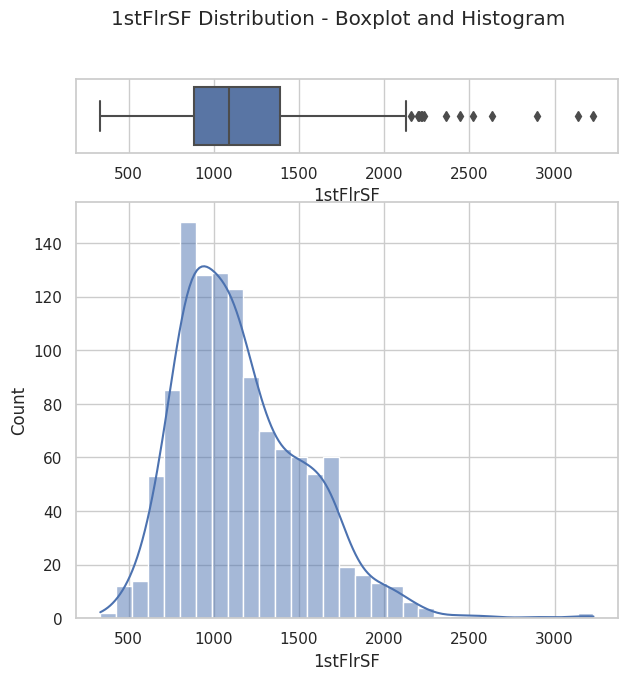

This is the range where a datapoint is not an outlier: from 126.12 to 2147.12




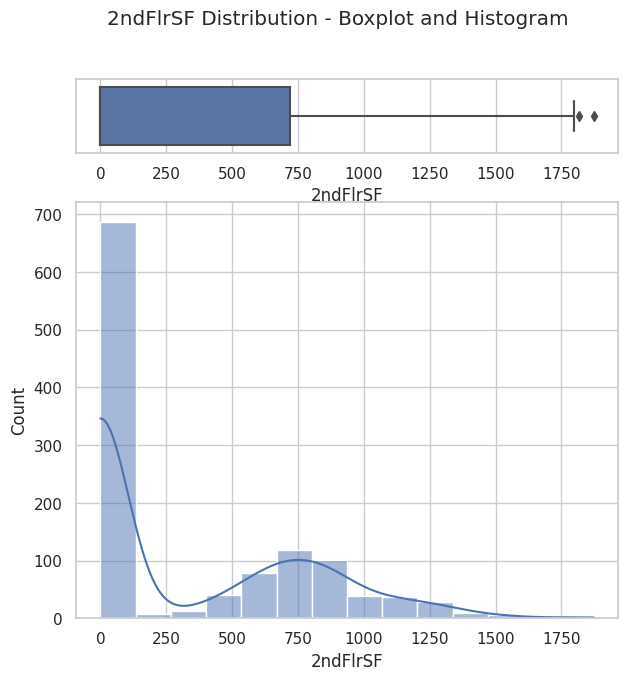

This is the range where a datapoint is not an outlier: from -1080.0 to 1800.0




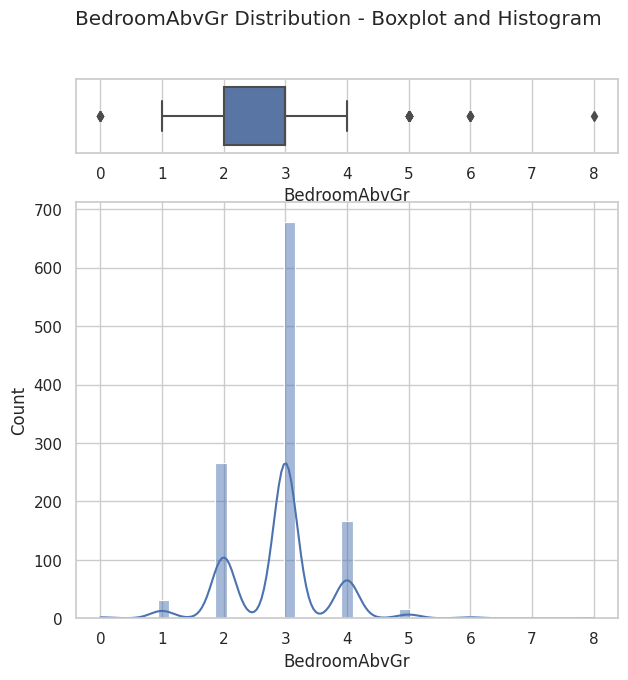

This is the range where a datapoint is not an outlier: from 0.5 to 4.5




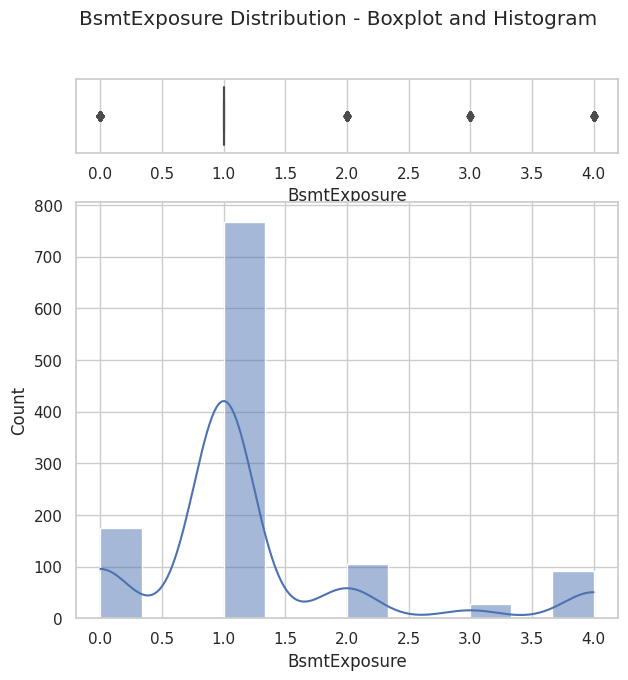

This is the range where a datapoint is not an outlier: from 1.0 to 1.0




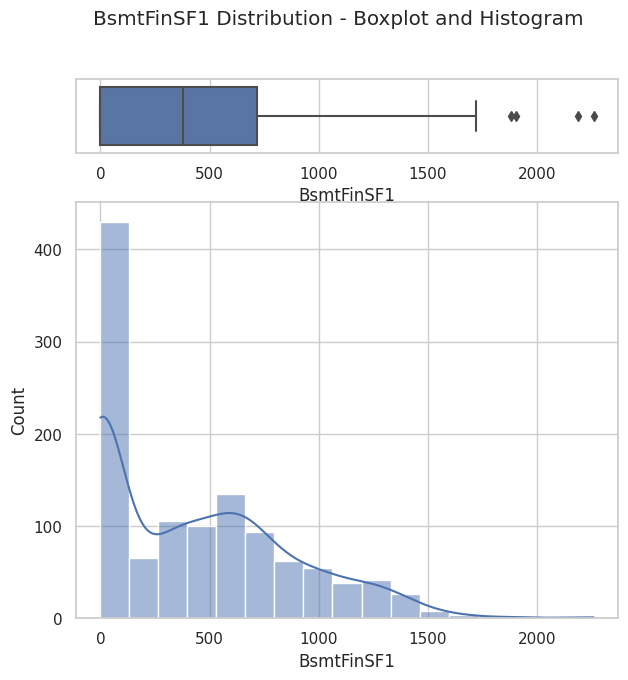

This is the range where a datapoint is not an outlier: from -1074.0 to 1790.0




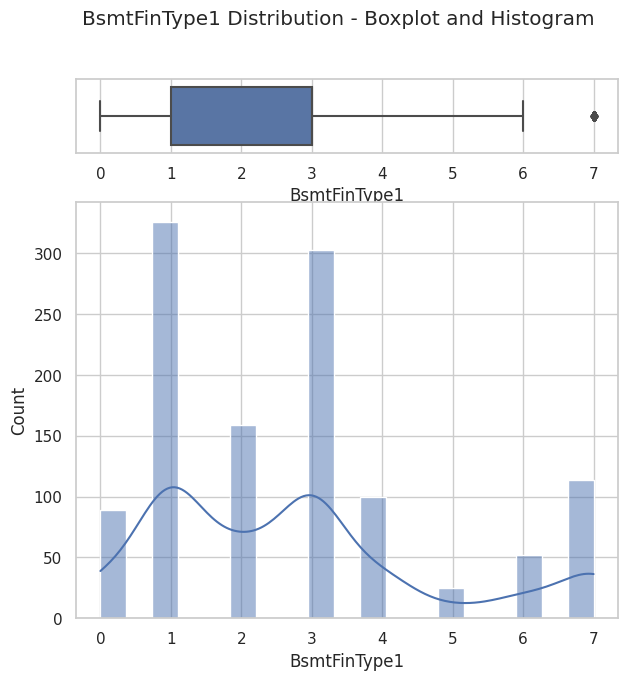

This is the range where a datapoint is not an outlier: from -2.0 to 6.0




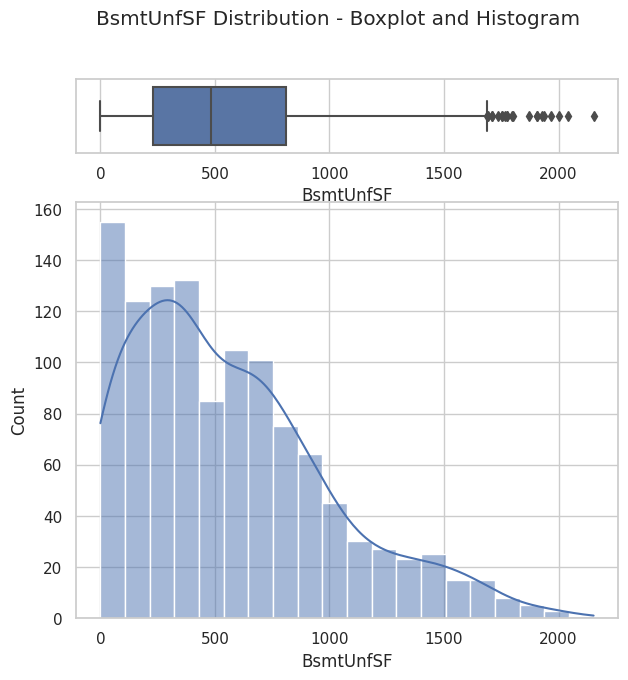

This is the range where a datapoint is not an outlier: from -646.88 to 1686.12




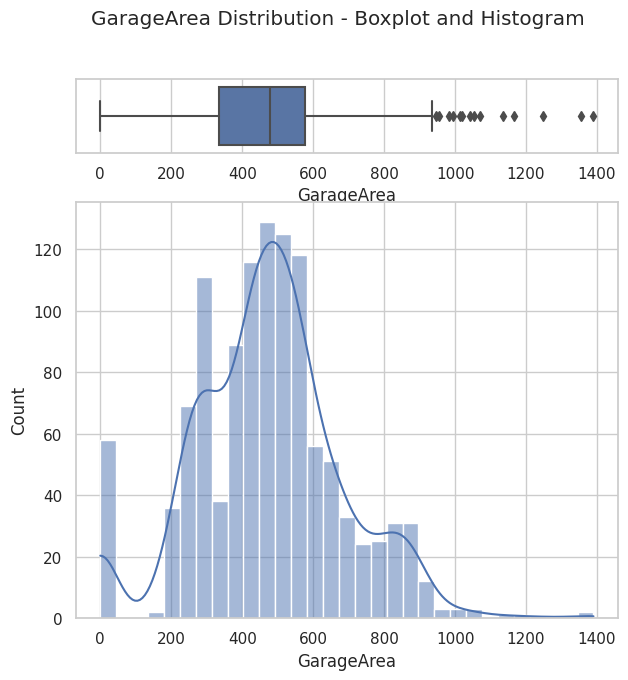

This is the range where a datapoint is not an outlier: from -24.0 to 936.0




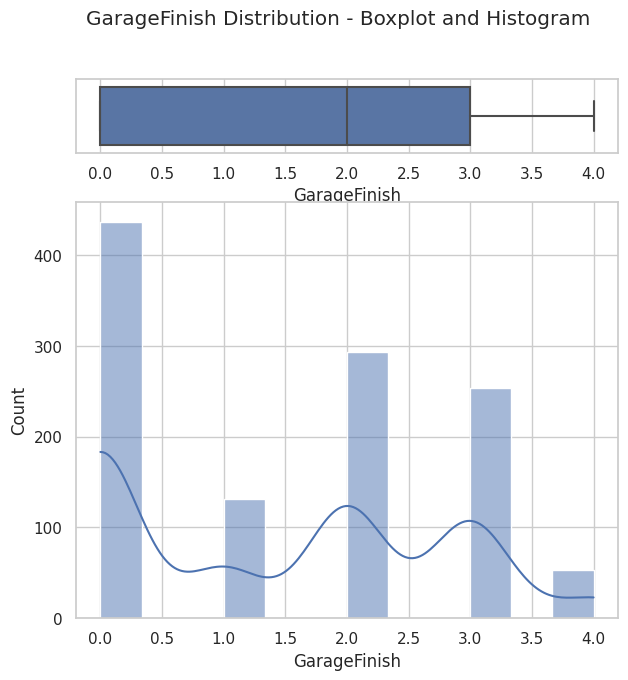

This is the range where a datapoint is not an outlier: from -4.5 to 7.5




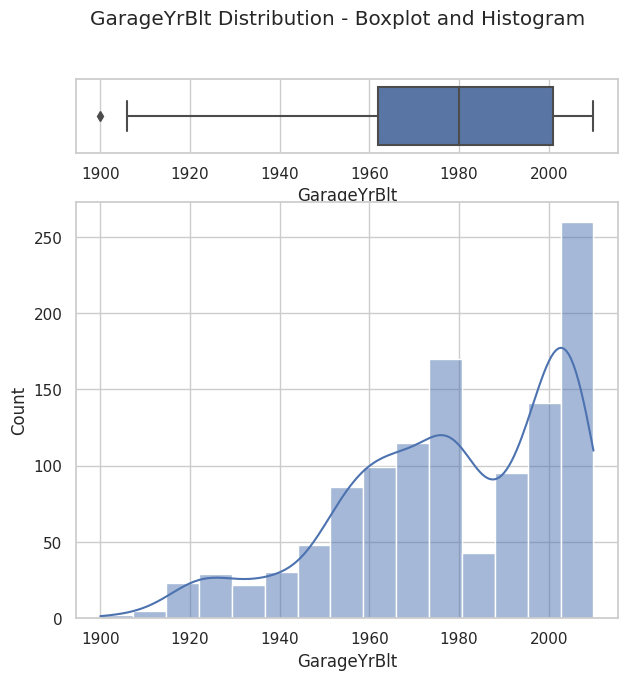

This is the range where a datapoint is not an outlier: from 1903.5 to 2059.5




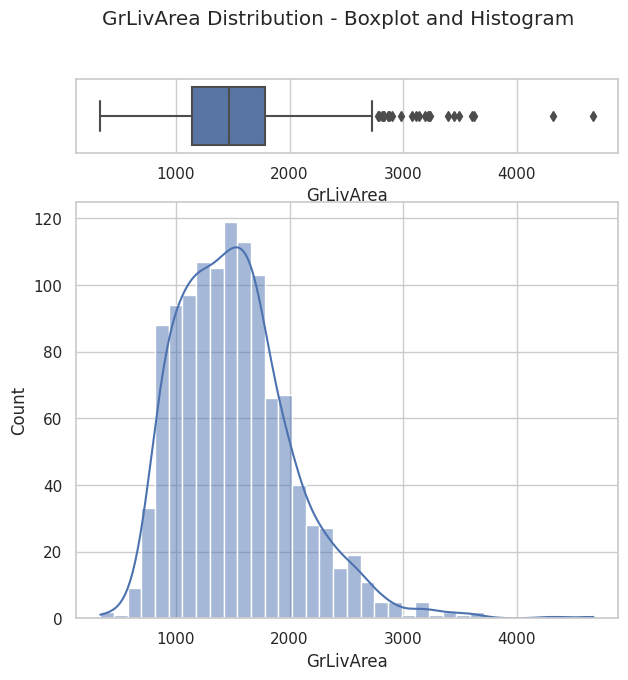

This is the range where a datapoint is not an outlier: from 164.75 to 2762.75




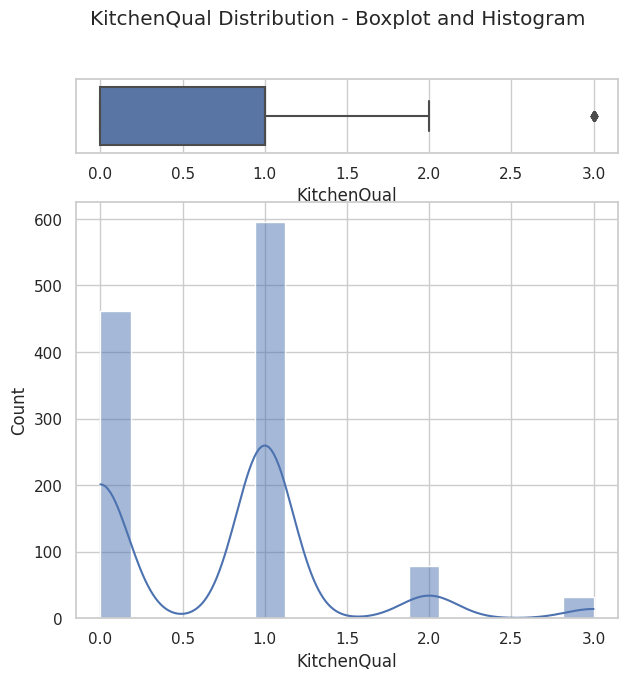

This is the range where a datapoint is not an outlier: from -1.5 to 2.5




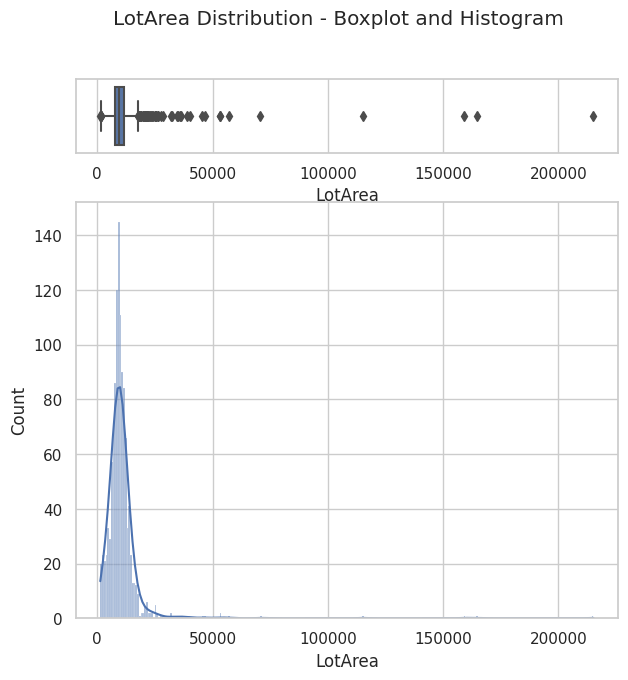

This is the range where a datapoint is not an outlier: from 1571.5 to 17619.5




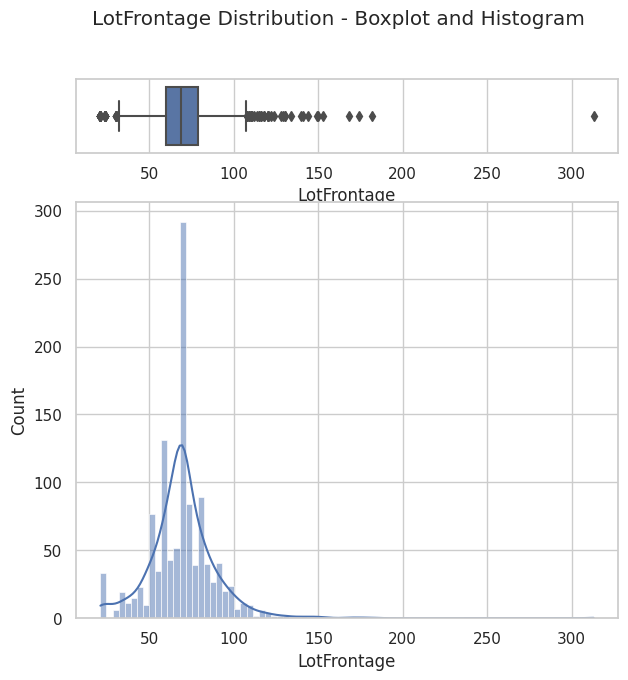

This is the range where a datapoint is not an outlier: from 31.5 to 107.5




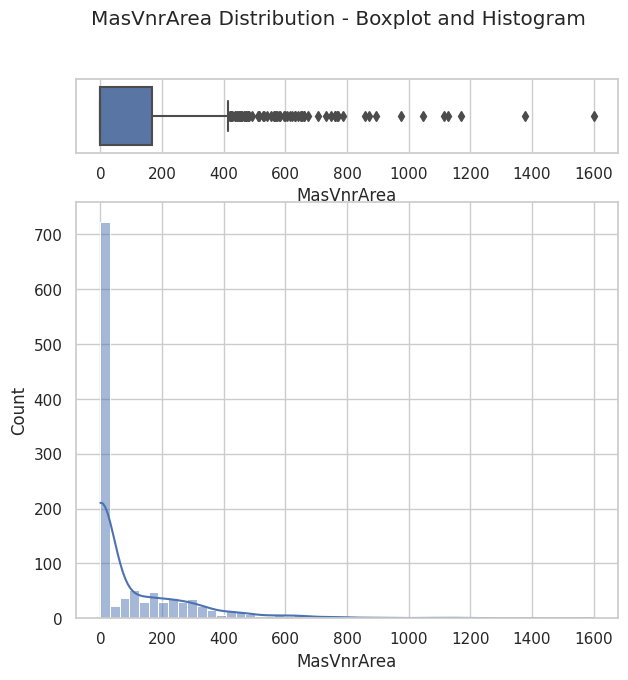

This is the range where a datapoint is not an outlier: from -249.38 to 415.62




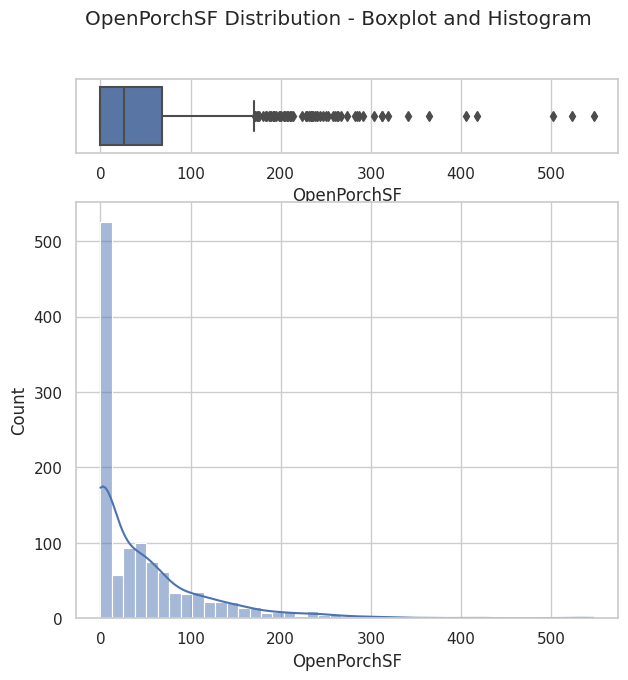

This is the range where a datapoint is not an outlier: from -102.0 to 170.0




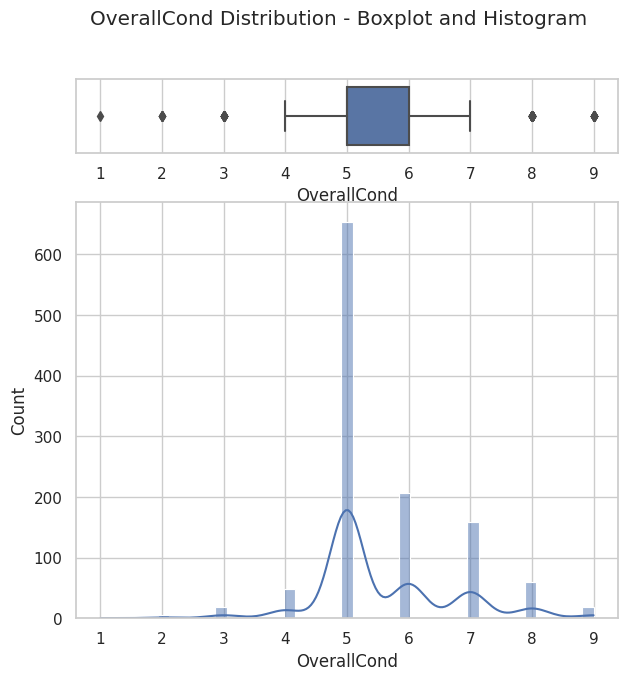

This is the range where a datapoint is not an outlier: from 3.5 to 7.5




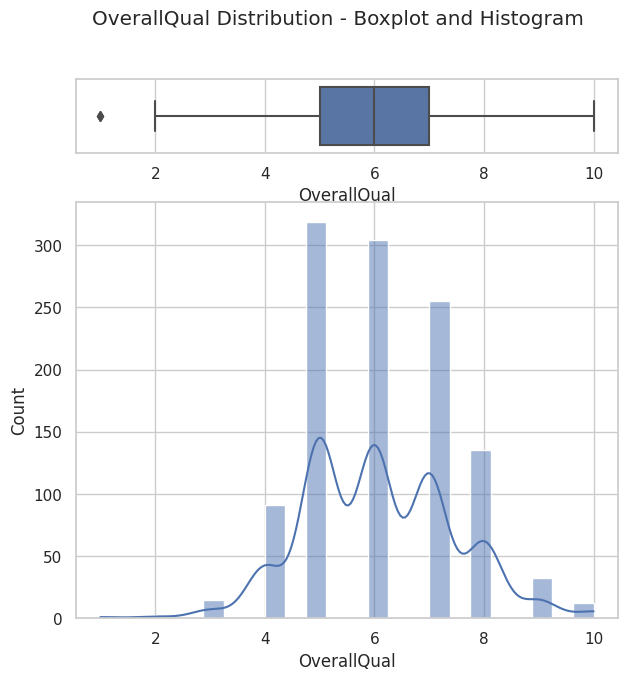

This is the range where a datapoint is not an outlier: from 2.0 to 10.0




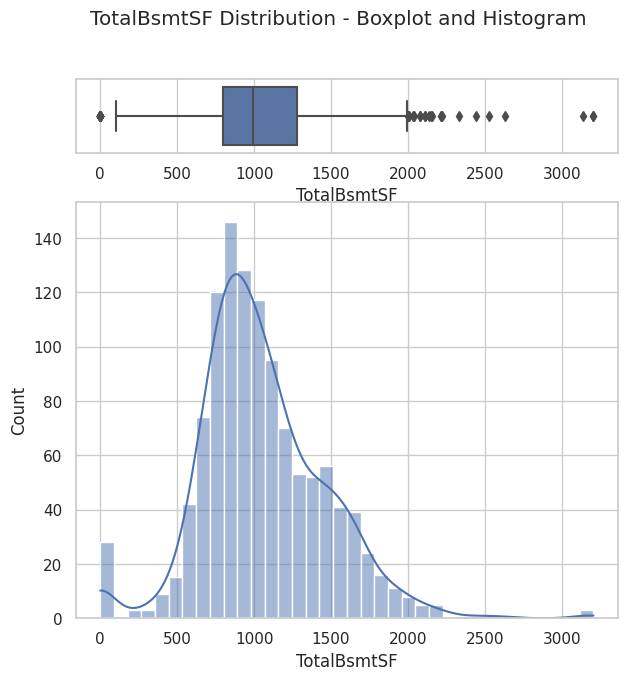

This is the range where a datapoint is not an outlier: from 82.5 to 1992.5




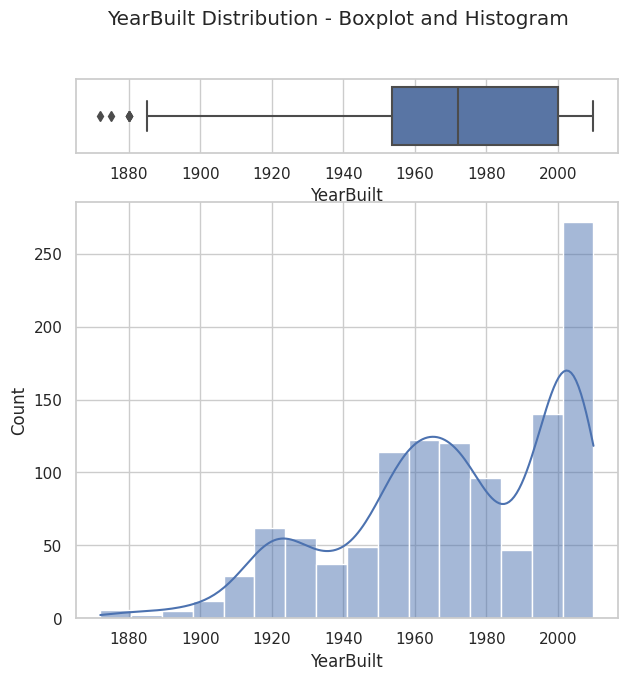

This is the range where a datapoint is not an outlier: from 1884.38 to 2069.38




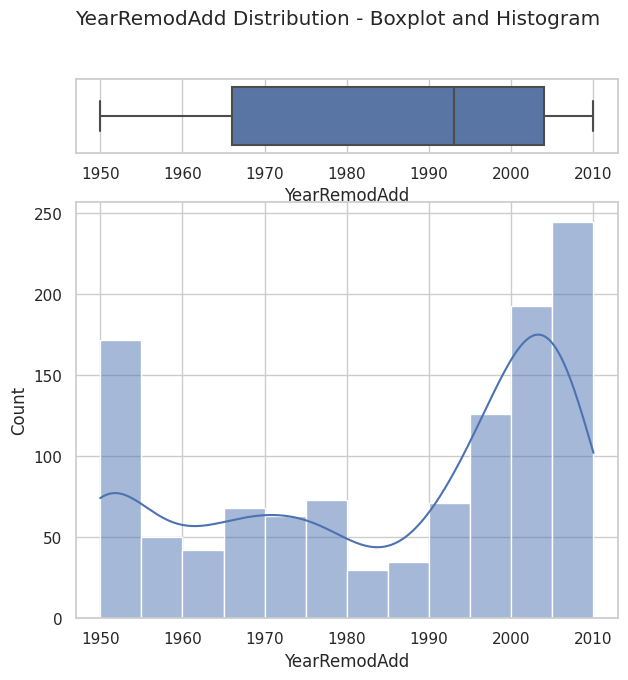

This is the range where a datapoint is not an outlier: from 1909.0 to 2061.0




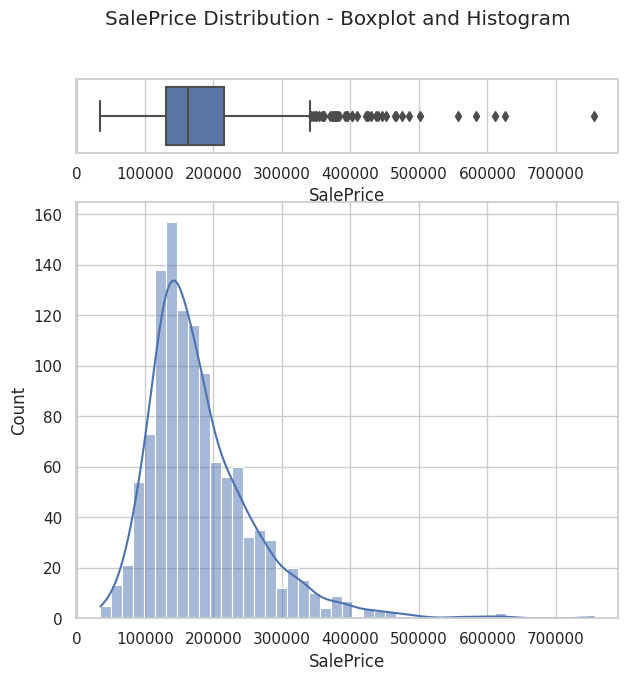

This is the range where a datapoint is not an outlier: from 2500.0 to 342500.0




In [21]:
def plot_histogram_and_boxplot(df):
  for col in df.columns:
    fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[0])
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
    plt.show()

    IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
    print(
        f"This is the range where a datapoint is not an outlier: from "
        f"{(df[col].quantile(q=0.25) - 1.5*IQR).round(2)} to "
        f"{(df[col].quantile(q=0.75) + 1.5*IQR).round(2)}")
    print("\n")

plot_histogram_and_boxplot(TrainSet)

In [ ]:
df_engineering = FeatureEngineeringAnalysis(df=, analysis_type='outlier_winsorizer')

---

In [12]:
df_engineering = TrainSet.copy()
df_engineering.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      1828       0.0           3.0           Av          48      Missing   
1       894       0.0           2.0           No           0          Unf   
2       964       0.0           2.0           No         713          ALQ   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0       1774         774          Unf       2007.0  ...    11694        90.0   
1        894         308      Missing       1962.0  ...     6600        60.0   
2        163         432          Unf       1921.0  ...    13360        80.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0       452.0          108            5            9         1822       2007   
1         0.0            0            5            5          894       1962   
2         0.0            0            7            5          876       1921   

   YearRemodAdd  SalePrice  
0          2007     314813  
1          1962     109500  
2          2006     163500  

[3 rows x 22 columns]

In [13]:
from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="variance")

corr_sel.fit_transform(df_engineering)
corr_sel.correlated_feature_sets_

[{'1stFlrSF', 'TotalBsmtSF'},
 {'2ndFlrSF', 'GrLivArea'},
 {'GarageArea', 'SalePrice'},
 {'GarageYrBlt', 'YearBuilt', 'YearRemodAdd'}]

In [14]:
corr_sel.features_to_drop_

['1stFlrSF', '2ndFlrSF', 'GarageArea', 'GarageYrBlt', 'YearRemodAdd']

In [ ]:
from feature_engine.outliers import Winsorizer
def plot_histogram_and_boxplot(df):
  for col in df.columns:
    fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[0])
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
    plt.show()

    IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
    print(
        f"This is the range where a datapoint is not an outlier: from "
        f"{(df[col].quantile(q=0.25) - 1.5*IQR).round(2)} to "
        f"{(df[col].quantile(q=0.75) + 1.5*IQR).round(2)}")
    print("\n")

plot_histogram_and_boxplot(df)

## Conclusion